<a href="https://colab.research.google.com/github/OmarMohammed88/GPA_Prediction/blob/master/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import numpy.ma as ma


In [0]:
data=pd.read_csv('DATA1.csv')


<p>Display all Data </p>

In [0]:
def display_all(data):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(data)

<p style="color:blue"> Drop Timestamp and GPA columns From Excel Sheet</p>



In [0]:

#data1=data1.drop('GPA :', axis=1) Without Label

In [0]:
 X=np.array(data)


<h2>Covariance Matrix and Mean


In [0]:
cov=np.cov(X,y=None, rowvar=False, bias=False, ddof=None, fweights=None, aweights=None)
mean=np.mean(X,axis=0)

<p color='blue'> Generating New Data from Old Distribution Data </p>

In [43]:
Size_of_Data=243
New_Data= np.random.multivariate_normal(mean, cov,Size_of_Data)
New_Data.shape

(243, 4)

<h3 color='red'> Ploting Old Data and New Data</h3>

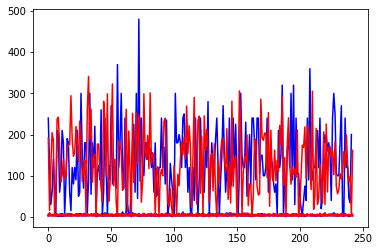

In [44]:
New_Data[New_Data < 0] = 0
plt.plot(X,color='blue')
plt.plot(New_Data,color='r')
plt.show()

<h4> This Function Delete rows whose Values =0</h4>

In [0]:
#Function Clean Data Whose Values Are 0
def Delete_Zeros(New_Data):
  index=[]
  for i in New_Data :
    if np.count_nonzero(i == 0) > 0 or np.count_nonzero(i ==( 0)):
        index.append(np.where(np.all(New_Data==i,axis=1))[0][0])
  cleaned_data=np.delete(New_Data,index,0) 
  return cleaned_data

Cleaned_data1=Delete_Zeros(New_Data)


In [0]:
#function Delete rows whose values >6 Days
def constrains_per_day(cleaned_data1):
  x=[]
  for i in range(len(cleaned_data1)):
    if cleaned_data1[i][3]>6:
      x.append(i)  
  cleaned_data2=np.delete(cleaned_data1,x,0)
  return cleaned_data2
Cleaned_data2=constrains_per_day(Cleaned_data1)



In [0]:
#This function delete rows whose Values >10 hours
def constrains_per_hours(Cleaned_data2):
  x=[]
  for i in range(len(Cleaned_data2)):
    if Cleaned_data2[i][2]>10:
      x.append(i)  
  cleaned_data3=np.delete(Cleaned_data2,x,0)
  return cleaned_data3

Cleaned_data3=constrains_per_hours(Cleaned_data2)



In [0]:
#This function delete rows whose values <5 min and >300 min
def constrains_per_min_Road(Cleaned_data3):
  x=[]
  for i in range(len(Cleaned_data3)):
    if Cleaned_data3[i][1]<5 or Cleaned_data3[i][0]>300:
      x.append(i)  
  cleaned_data4=np.delete(Cleaned_data3,x,0)
  return cleaned_data4

Final_Data=constrains_per_min_Road(Cleaned_data3)


<h1 color="blue">Ploting The New Data After Cleaning and Old Data</h1>

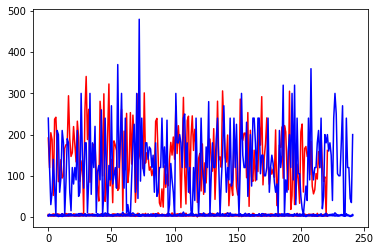

In [49]:
# The New Data Represented by red Color 
plt.plot(Final_Data,color='r')
plt.plot(data,color='blue')
plt.show()

<h1>The Percentage of data After Cleaning</h1>

In [50]:
Size_After_cleaning=Final_Data.shape[0]
def Percentage_Of_Cleaning(Size_of_Data,Size_After_cleaning):
   result=((Size_of_Data-Size_After_cleaning)/Size_of_Data)*100
   print(result)
Percentage_Of_Cleaning(Size_of_Data,Size_After_cleaning)

8.641975308641975


<h1>KNN For Testing Distance between two classes</h1>

In [0]:
ones=np.ones(242)


In [57]:
Final_Data.shape

(222, 4)

In [0]:
zeros=np.zeros(222)
# column_to_be_added_zeros = np.array(zeros)
# class_zeros = np.column_stack((X, column_to_be_added_zeros))
# class_zeros

In [59]:
Merge_data=np.concatenate((X, Final_Data), axis=0)
Y_label=np.concatenate((ones,zeros),axis=0)
Y_label.shape

(464,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Merge_data,Y_label, test_size=0.2) # change test_size and no of features

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [118]:
from sklearn import metrics

y_pred = classifier.predict(X_test)
print(metrics.accuracy_score( y_pred,y_test))

0.5376344086021505


In [119]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_pred,y_test))

[[20 25]
 [18 30]]
              precision    recall  f1-score   support

         0.0       0.44      0.53      0.48        38
         1.0       0.62      0.55      0.58        55

    accuracy                           0.54        93
   macro avg       0.53      0.54      0.53        93
weighted avg       0.55      0.54      0.54        93



In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

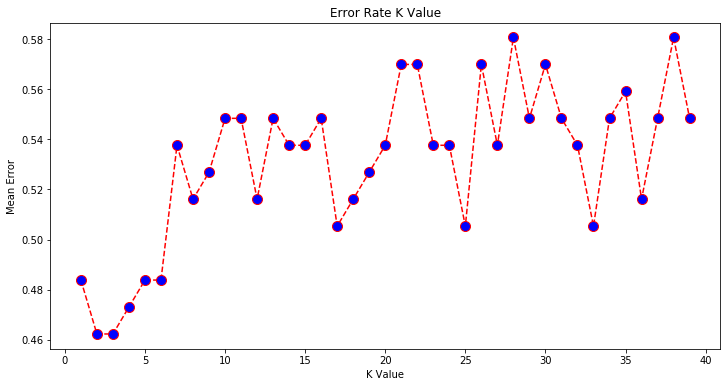

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')